# Qualitätsmessungen für Bildsegmentierung
Um zu bestimmen, wie gut ein Segmentierungsalgorithmus ist, und um verschiedene Algorithmen zu vergleichen, benötigen wir eine Metrik. Eine gängige Metrik ist der [Jaccard-Index](https://en.wikipedia.org/wiki/Jaccard_index), der ein Maß für die Überlappung zwischen einer Referenzsegmentierung und der Segmentierung, die ein Algorithmus beispielsweise produziert hat, darstellt. Wenn wir mit Labelbildern arbeiten, ist eine faire Methode, die Überlappung jedes annotierten Objekts mit dem am stärksten überlappenden Objekt in der automatischen Segmentierung zu bestimmen. Wenn wir diesen Wert über alle annotierten Objekte mitteln, erhalten wir den [Sparse Jaccard Index, wie er in The Segmentation Game definiert ist](https://github.com/haesleinhuepf/the-segmentation-game#segmentation-algorithm-comparison).

In [10]:
import os
import napari
import napari_segment_blobs_and_things_with_membranes as nsbatwm
from the_segmentation_game import metrics
from skimage.io import imread

Um dies zu demonstrieren, wählen wir ein zufälliges Beispielbild aus dem [BBBC007](https://bbbc.broadinstitute.org/BBBC007) Datensatz (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), verfügbar in der Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012].

In [9]:
image_folder = "../../data/BBBC007_batch/"
sparse_annotation_folder = "../../data/BBBC007_sparse_instance_annotation/"

test_image_filename = "17P1_POS0013_D_1UL.tif"

Zur Visualisierung des Bildes und der entsprechenden manuellen Annotation verwenden wir napari.

In [3]:
viewer = napari.Viewer()

## Das Beispielbild

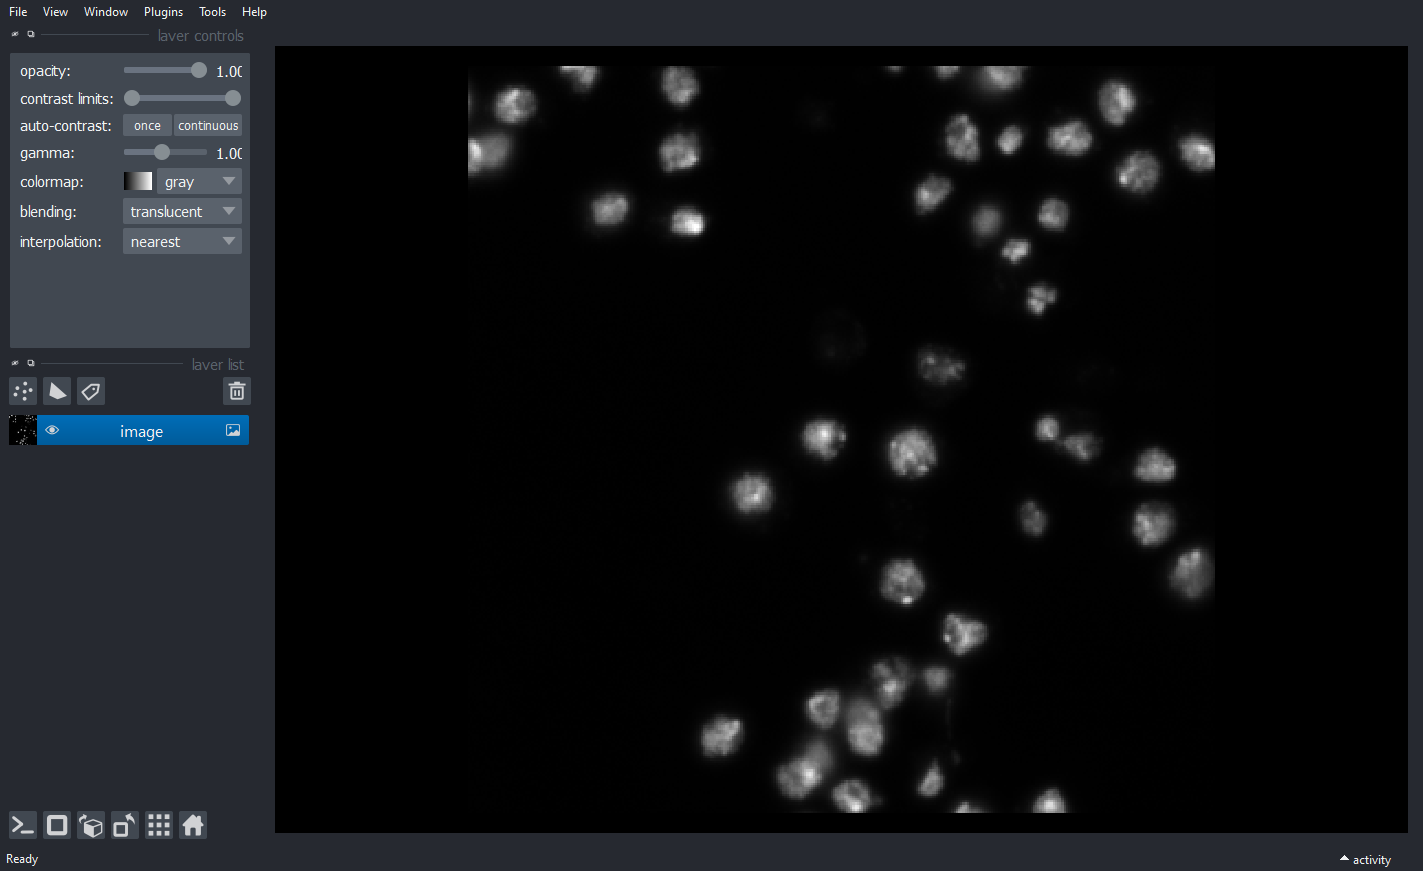

In [4]:
image = imread(folder + test_image_filename)

viewer.add_image(image)

napari.utils.nbscreenshot(viewer)

## Die manuelle Annotation

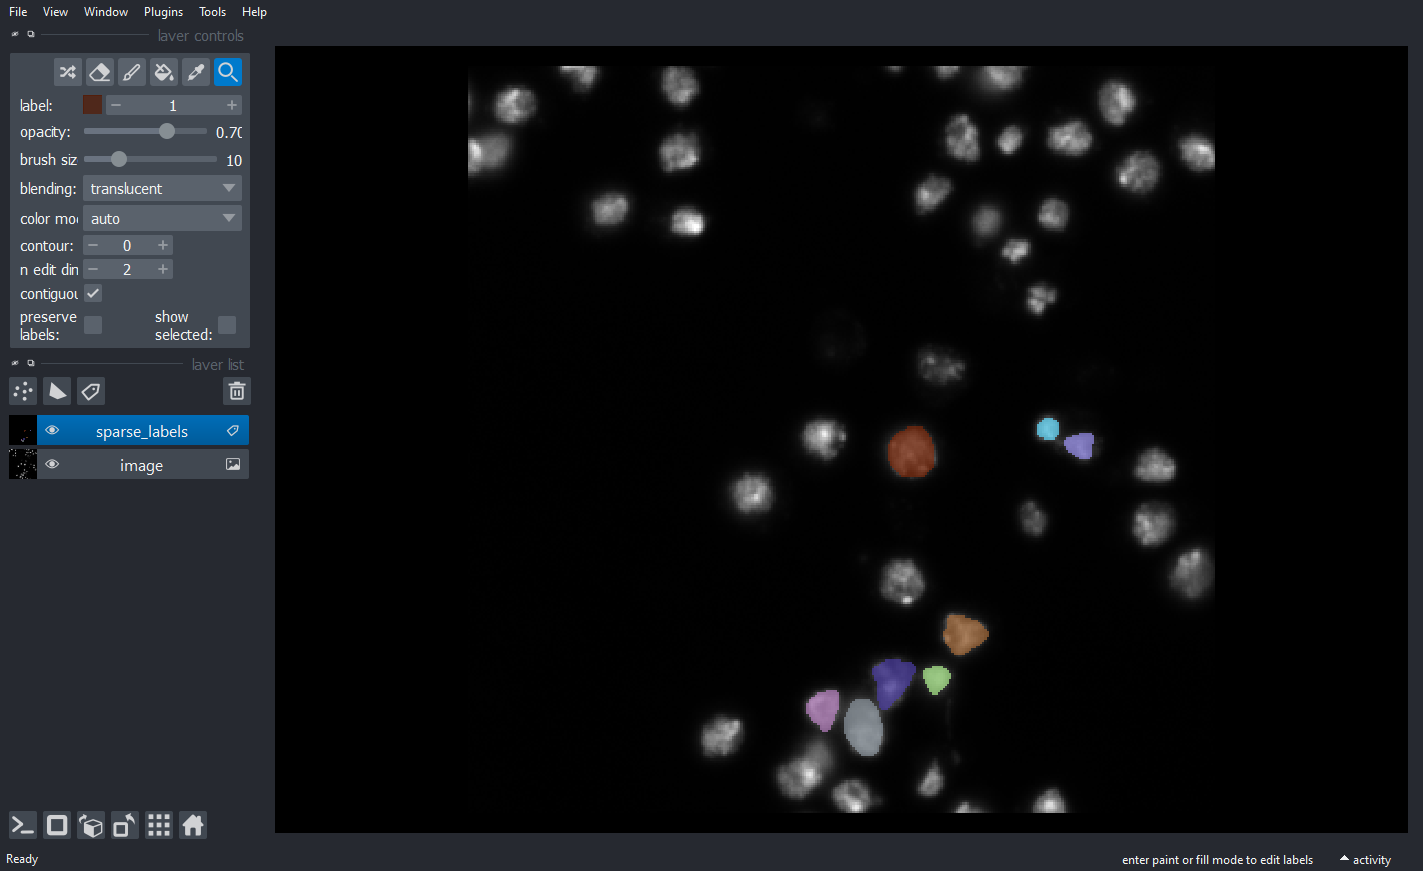

In [5]:
sparse_labels = imread(sparse_annotation_folder + test_image_filename)

viewer.add_labels(sparse_labels)

napari.utils.nbscreenshot(viewer)

In [6]:
# letzte Labels-Ebene ausblenden
viewer.layers[-1].visible = False

## Die automatische Segmentierung
Zu Demonstrationszwecken verwenden wir Hintergrundsubtraktion und Voronoi-Otsu-Labeling, um die Zellkerne in diesem Bild automatisch zu segmentieren.

In [15]:
def my_segmentation_algorithm(input_image):

    # Hintergrundsubtraktion
    background_subtracted = nsbatwm.white_tophat(input_image, radius = 10)
    
    # Instanzsegmentierung / Labeling
    labels_result = nsbatwm.voronoi_otsu_labeling(background_subtracted, spot_sigma=5, outline_sigma=1)

    return labels_result

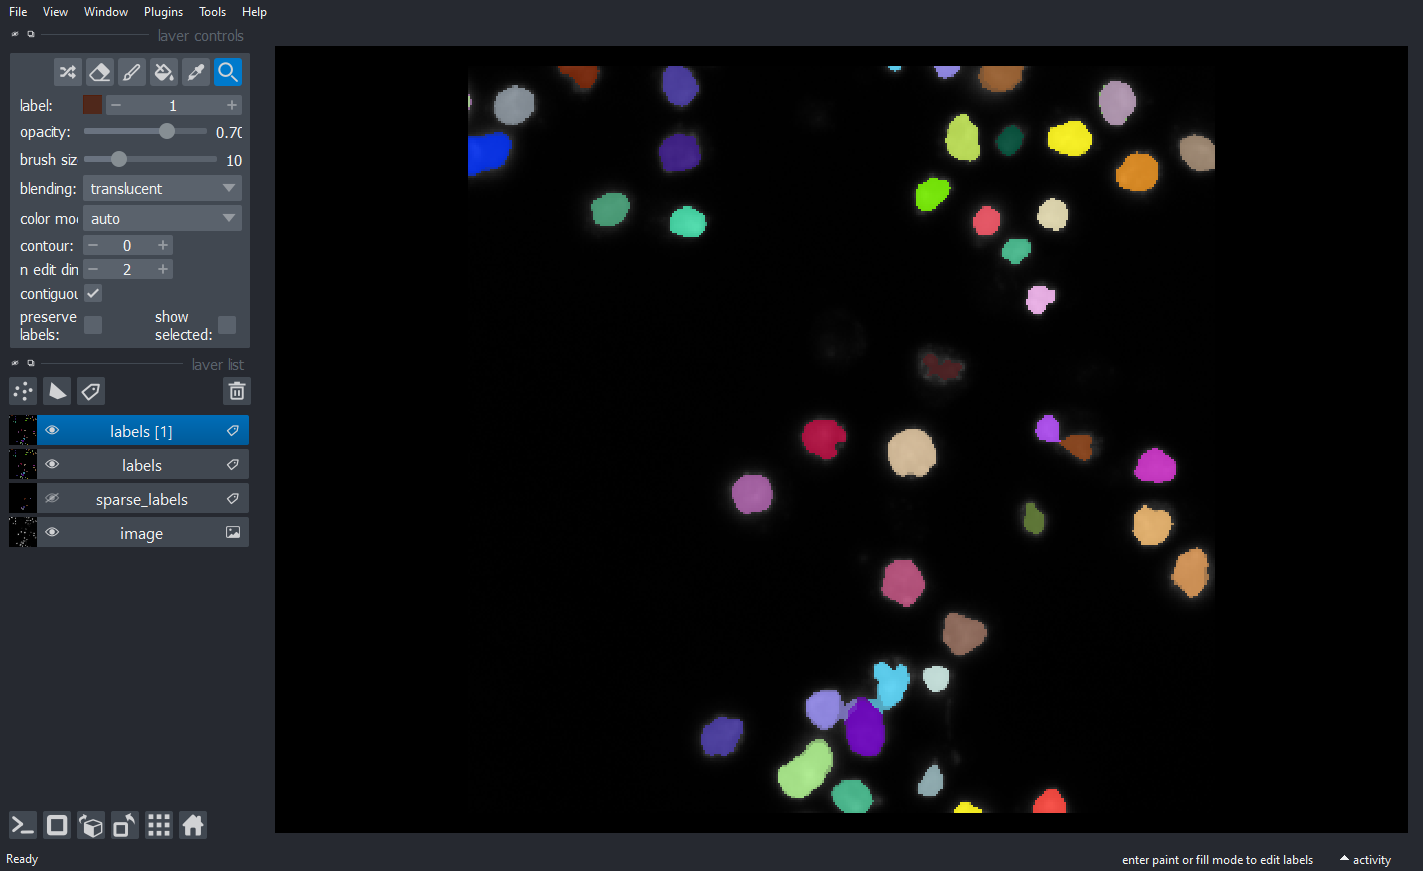

In [16]:
labels = my_segmentation_algorithm(image)

viewer.add_labels(labels)

napari.utils.nbscreenshot(viewer)

## Qualitätsschätzung: Sparse Jaccard Index
Aus den beiden oben geladenen und erzeugten Labelbildern können wir den Sparse Jaccard Index berechnen.

In [17]:
metrics.jaccard_index_sparse(sparse_labels, labels)

0.8357392602053431

## Übung
Verwenden Sie die folgende for-Schleife und Code-Snippets von oben, um die Segmentierungsqualität für alle Bilder im Ordner zu berechnen. Geben Sie die durchschnittliche Qualität über alle Bilder an.

In [18]:
for image_filename in os.listdir(image_folder):
    print(image_folder + image_filename)

../../data/BBBC007_batch/17P1_POS0013_D_1UL.tif
../../data/BBBC007_batch/20P1_POS0005_D_1UL.tif
../../data/BBBC007_batch/20P1_POS0007_D_1UL.tif
../../data/BBBC007_batch/20P1_POS0010_D_1UL.tif
../../data/BBBC007_batch/A9 p7d.tif
../../data/BBBC007_batch/AS_09125_040701150004_A02f00d0.tif
